In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Customer Churn.csv')

In [3]:
data.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [5]:
data.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

In [81]:
data.shape

(3150, 20)

### Missing Values

In [6]:
data.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

### Exploratory Data Analysis

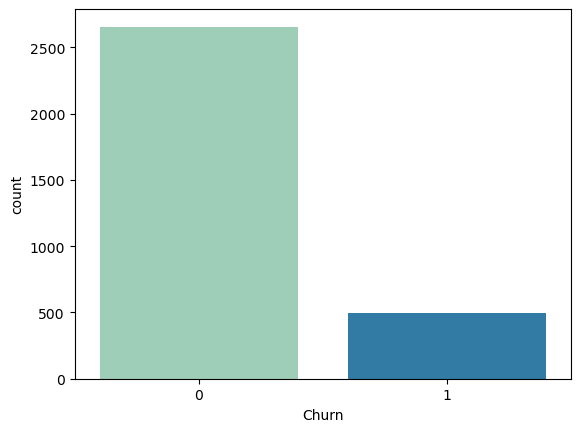

In [7]:
sns.countplot(x='Churn', data=data, palette='YlGnBu')
plt.show();

<Axes: xlabel='Churn', ylabel='Seconds of Use'>

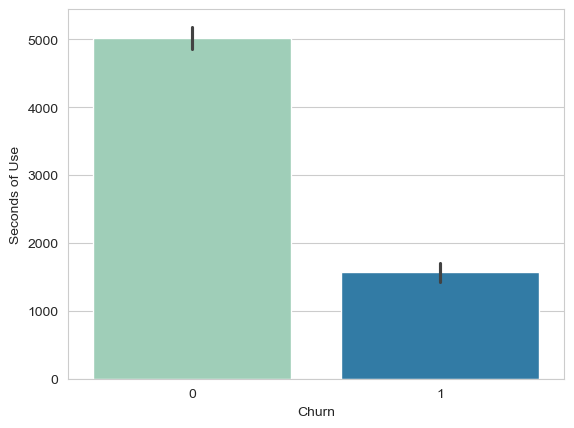

In [8]:
sns.set_style('whitegrid')
sns.barplot(x='Churn', y='Seconds of Use', data=data, palette='YlGnBu')

<Axes: xlabel='Churn', ylabel='count'>

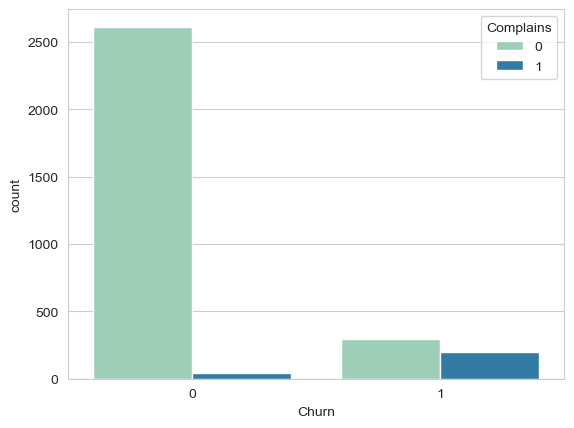

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Churn', hue='Complains',data=data, palette='YlGnBu')

<Axes: xlabel='Churn', ylabel='count'>

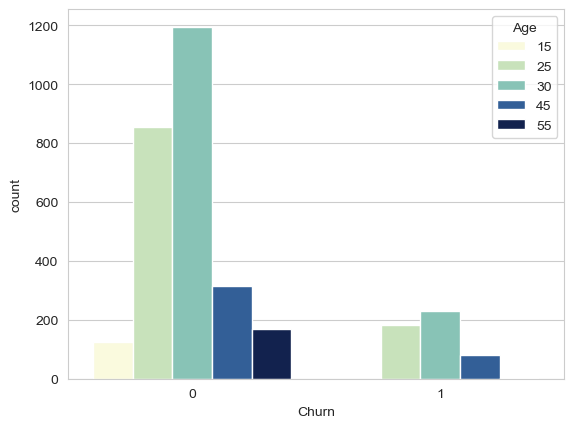

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Churn', hue='Age',data=data, palette='YlGnBu')

<Axes: xlabel='Churn', ylabel='count'>

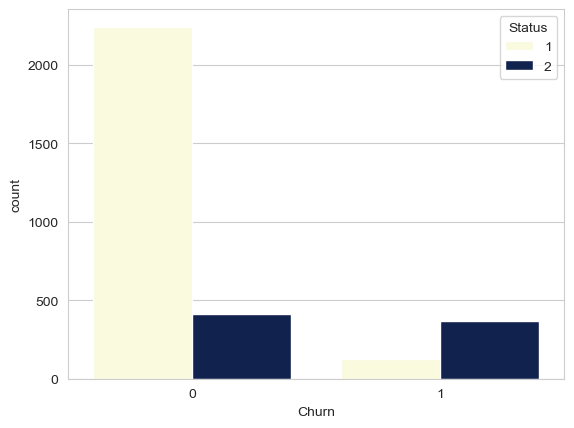

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Churn', hue='Status',data=data, palette='YlGnBu')

<Axes: xlabel='Churn', ylabel='count'>

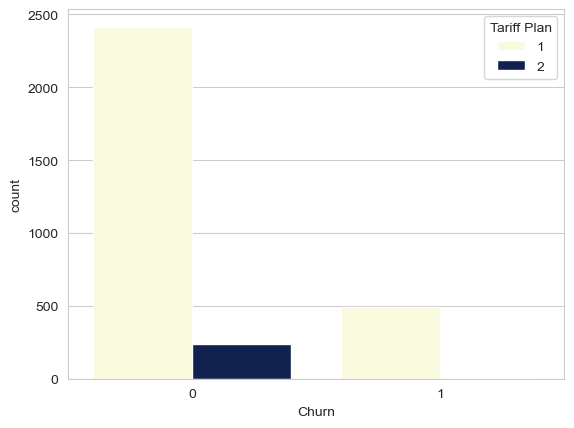

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Churn', hue='Tariff Plan',data=data, palette='YlGnBu')

<Axes: xlabel='Churn', ylabel='Customer Value'>

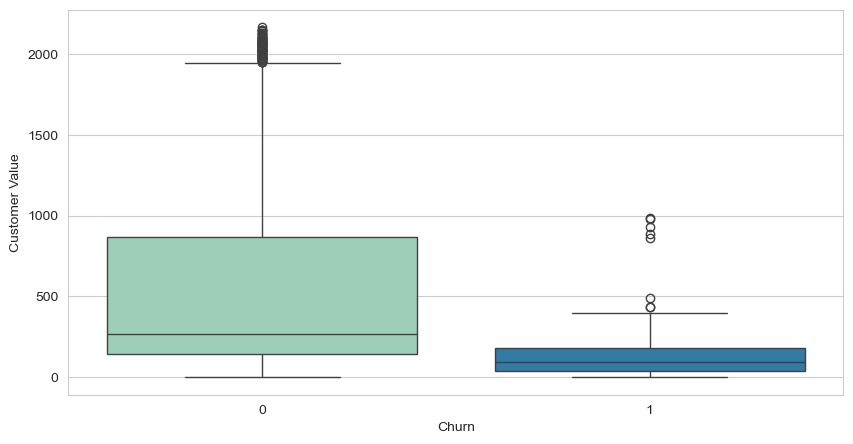

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Churn',y='Customer Value',data=data, palette='YlGnBu')

### Correlation

<Axes: >

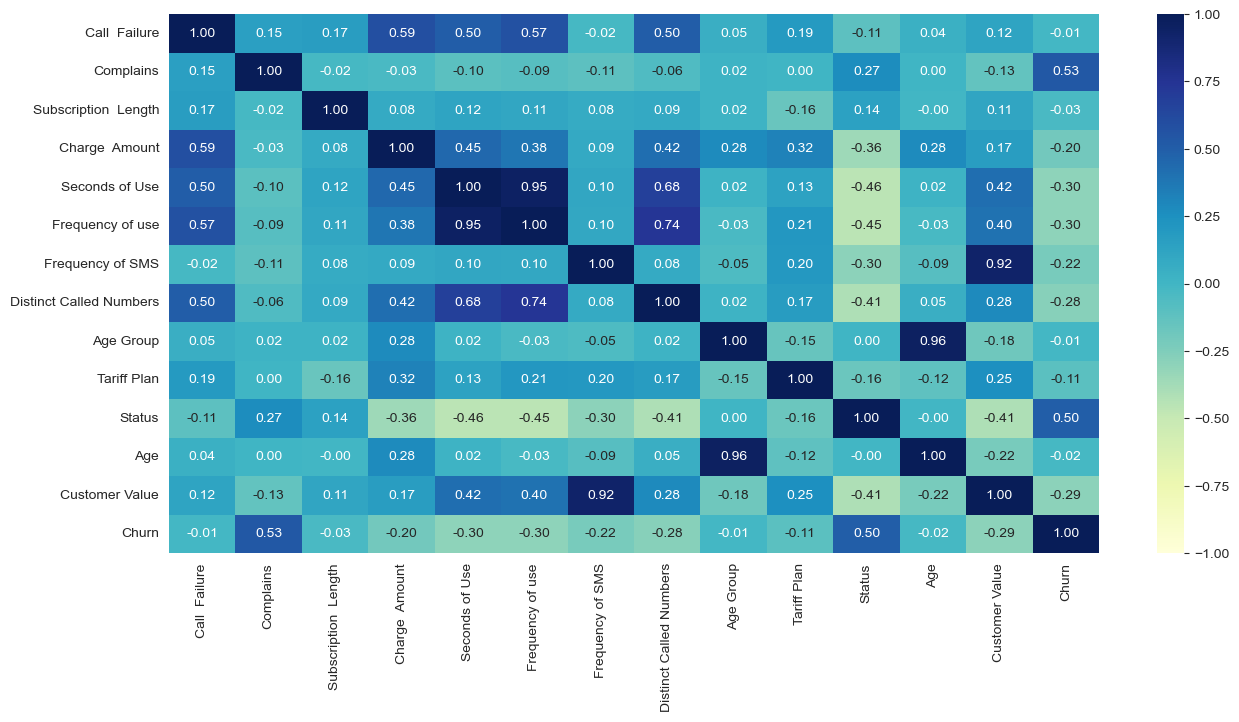

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, fmt ='.2f', cmap='YlGnBu')

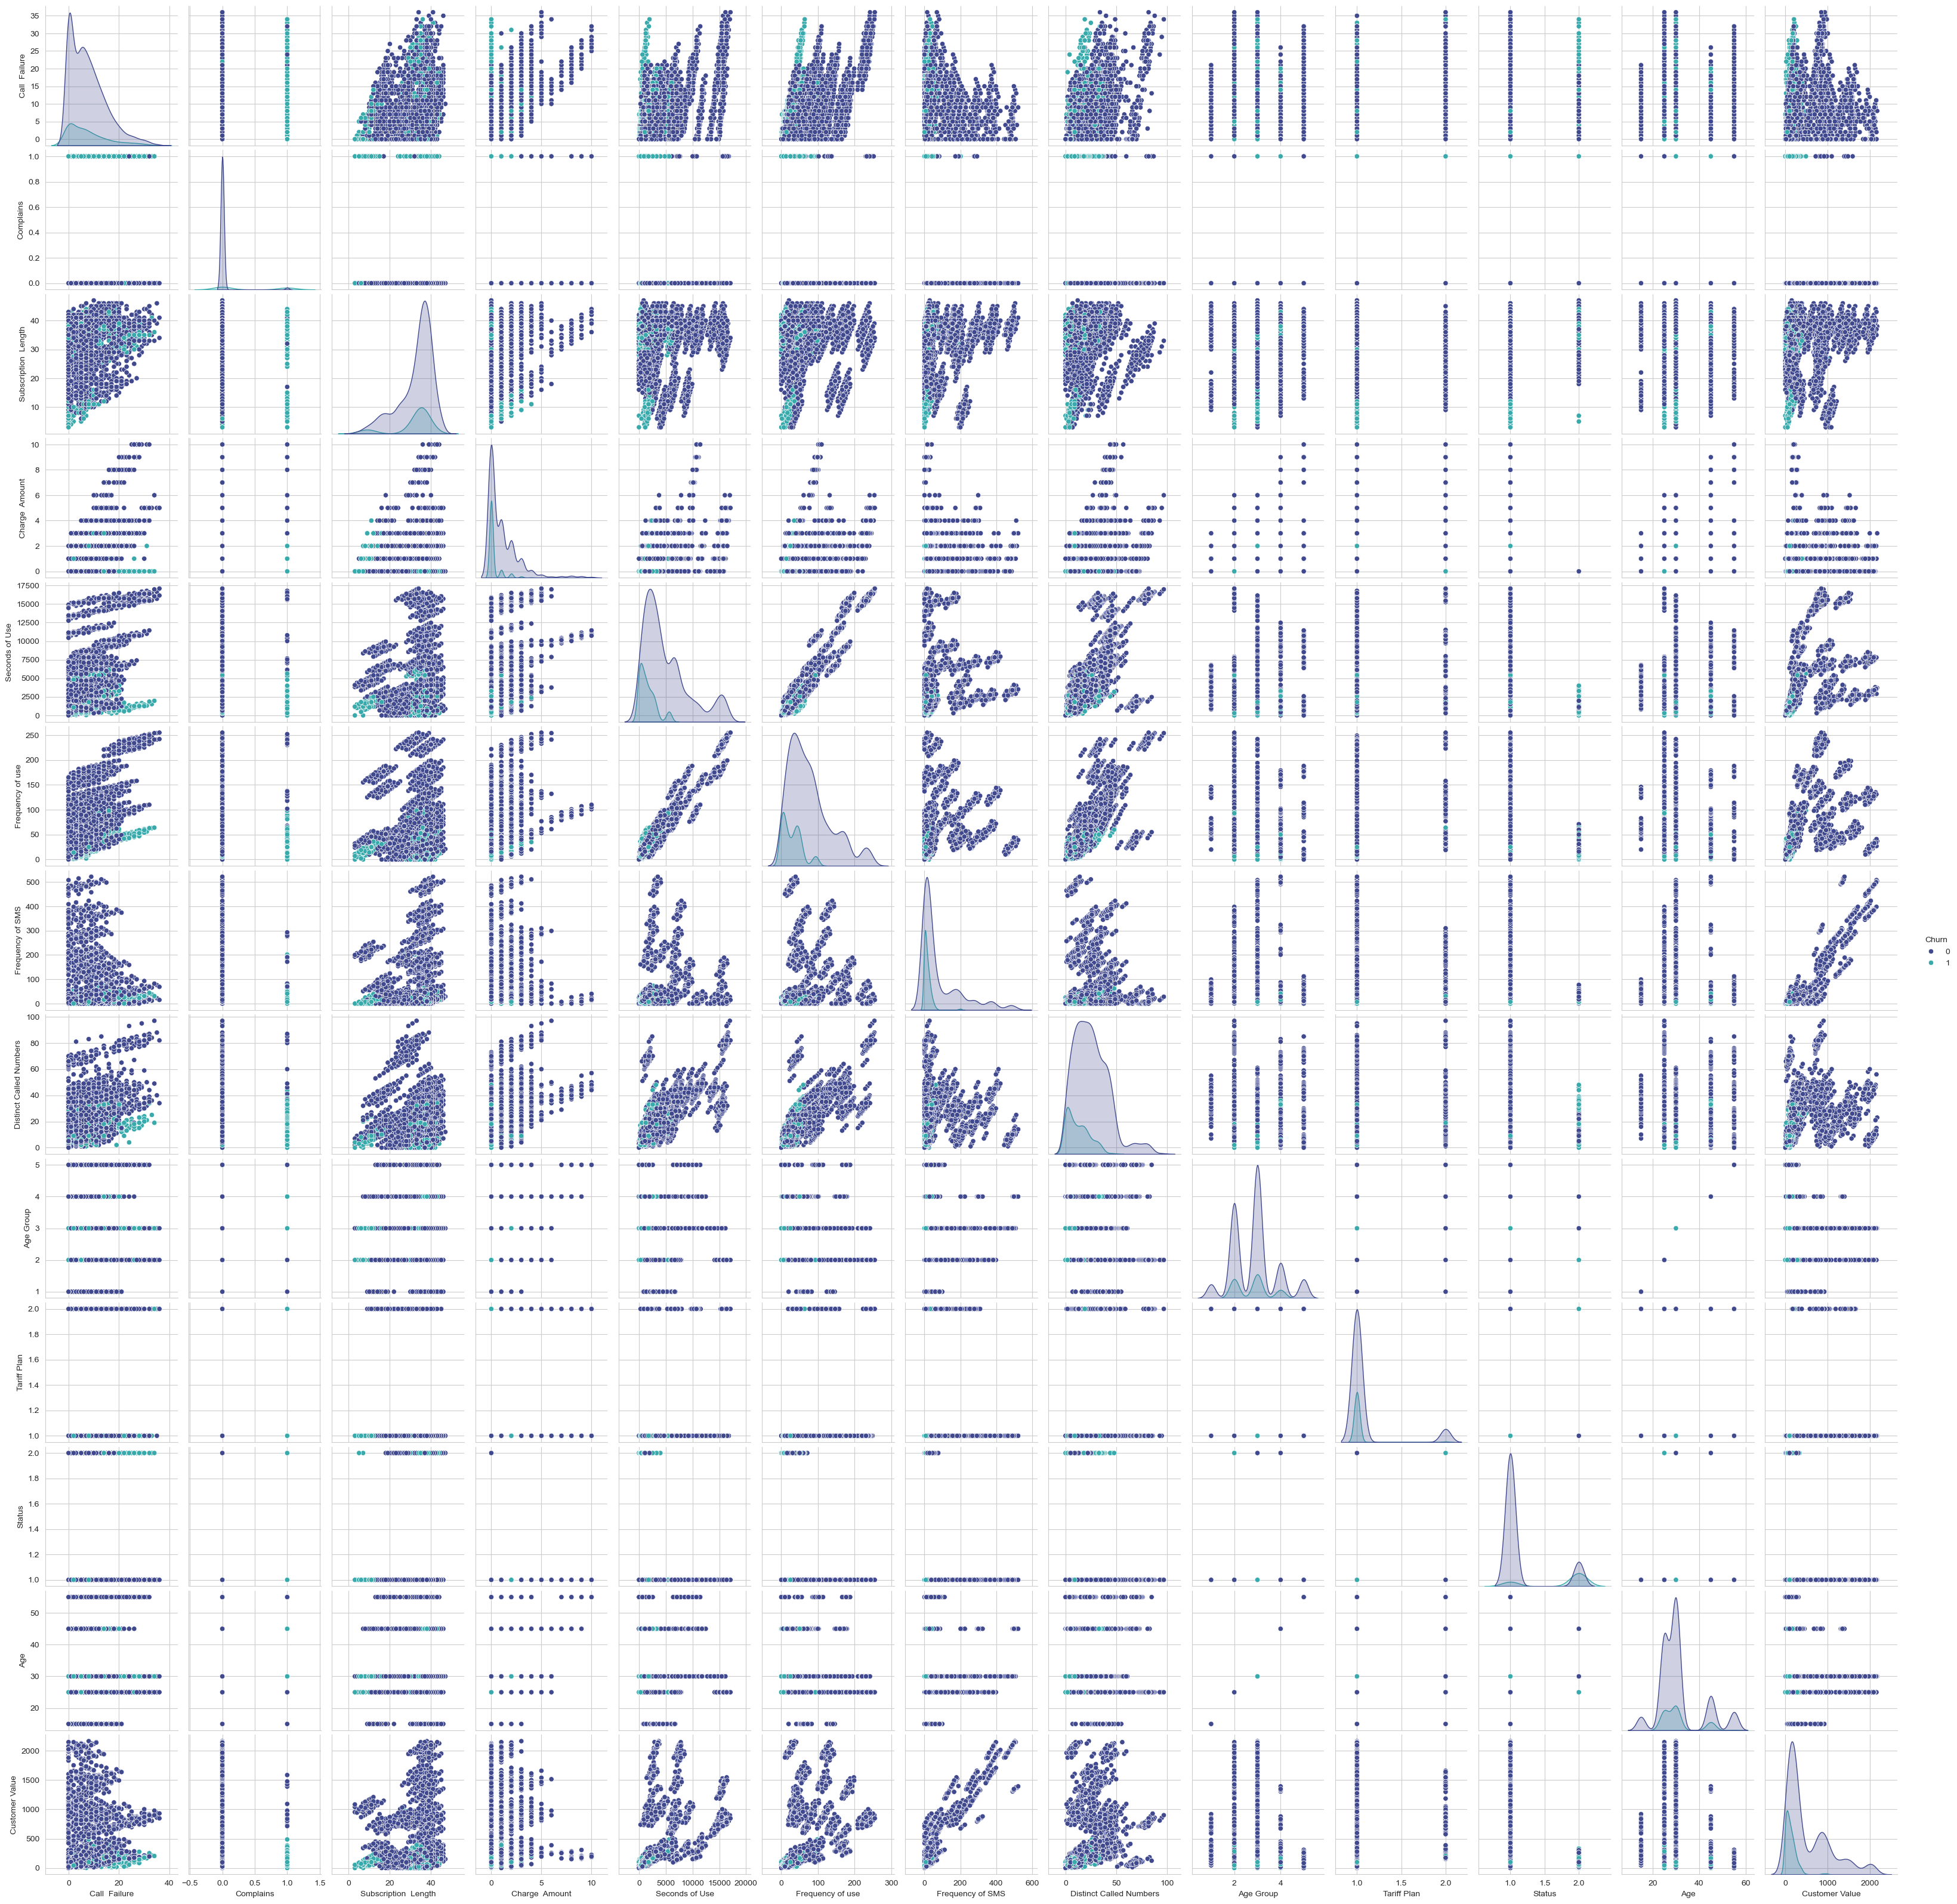

In [15]:
sns.pairplot(data, hue='Churn',palette='mako')

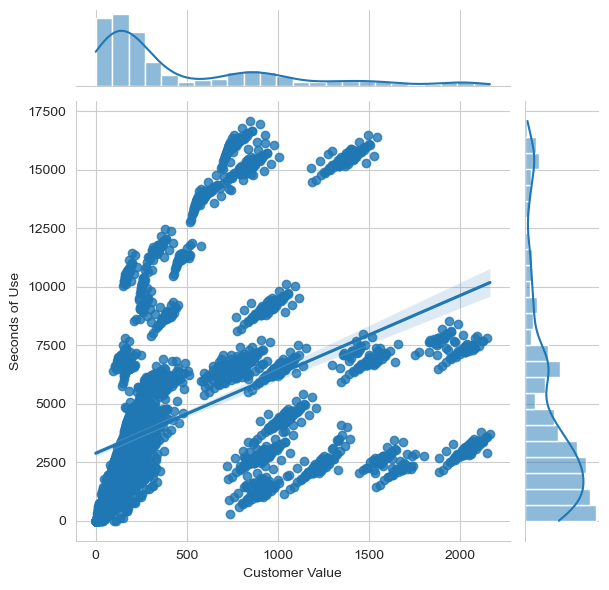

In [16]:
sns.jointplot(x='Customer Value',y='Seconds of Use',data=data, kind='reg')

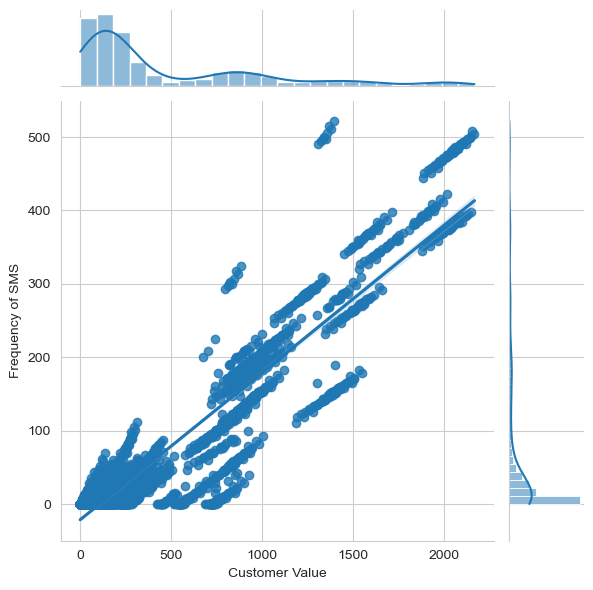

In [17]:
sns.jointplot(x='Customer Value',y='Frequency of SMS',data=data, kind='reg')

### Scaling the data

In [18]:
feature_scale = [feature for feature in data.columns if feature not in ['Churn','Age Group','Tariff Plan','Status','Age','Complains']]
scaler = StandardScaler()
data[feature_scale] = scaler.fit_transform(data[feature_scale])

<IPython.core.display.Javascript object>

In [19]:
data.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0       0.051229          0              0.636726       -0.619962   
1      -1.050285          0              0.753384       -0.619962   
2       0.326608          0              0.520069       -0.619962   
3       0.326608          0              0.636726       -0.619962   
4      -0.637217          0              0.636726       -0.619962   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0       -0.024411          0.026816         -0.607513   
1       -0.989807         -1.122926         -0.589691   
2       -0.481140         -0.164807          2.547012   
3       -0.065390         -0.060285         -0.643157   
4       -0.495435         -0.199648         -0.634246   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                -0.378158          3            1       1   30   
1                -1.133331          2            1       2   25   
2                 0.028473          3            1       1   30   
3                 0.667466          1            1       1   15   
4                 0.551285          1            1       1   15   

   Customer Value  Churn  
0       -0.528759      0  
1       -0.822036      0  
2        2.061285      0  
3       -0.446775      0  
4       -0.629033      0

In [20]:
ohe_feature = [feature for feature in data.columns if feature not in feature_scale + ['Churn']]
ohe_feature

['Complains', 'Age Group', 'Tariff Plan', 'Status', 'Age']

In [21]:
data = pd.get_dummies(data, columns=ohe_feature, drop_first=True)

In [22]:
data.head()

Call  Failure  Subscription  Length  Charge  Amount  Seconds of Use  \
0       0.051229              0.636726       -0.619962       -0.024411   
1      -1.050285              0.753384       -0.619962       -0.989807   
2       0.326608              0.520069       -0.619962       -0.481140   
3       0.326608              0.636726       -0.619962       -0.065390   
4      -0.637217              0.636726       -0.619962       -0.495435   

   Frequency of use  Frequency of SMS  Distinct Called Numbers  \
0          0.026816         -0.607513                -0.378158   
1         -1.122926         -0.589691                -1.133331   
2         -0.164807          2.547012                 0.028473   
3         -0.060285         -0.643157                 0.667466   
4         -0.199648         -0.634246                 0.551285   

   Customer Value  Churn  Complains_1  Age Group_2  Age Group_3  Age Group_4  \
0       -0.528759      0            0            0            1            0   
1       -0.822036      0            0            1            0            0   
2        2.061285      0            0            0            1            0   
3       -0.446775      0            0            0            0            0   
4       -0.629033      0            0            0            0            0   

   Age Group_5  Tariff Plan_2  Status_2  Age_25  Age_30  Age_45  Age_55  
0            0              0         0       0       1       0       0  
1            0              0         1       1       0       0       0  
2            0              0         0       0       1       0       0  
3            0              0         0       0       0       0       0  
4            0              0         0       0       0       0       0

### Train Test Split

In [23]:
x = data.drop('Churn', axis=1)
y = data['Churn']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1,stratify=y)

<IPython.core.display.Javascript object>

In [24]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.4, random_state=1, stratify=y_train)

<IPython.core.display.Javascript object>

In [25]:
x_train.shape

(1512, 19)

In [26]:
x_val.shape

(1008, 19)

In [27]:
x_test.shape

(630, 19)

In [28]:
y_train.shape

(1512,)

In [29]:
y_val.shape

(1008,)

In [30]:
y_test.shape

(630,)

### Model Building

In [31]:
# defining a function for rmse score
def rmse(actual,pred):
    mse = ((actual - pred)**2).mean()
    rmse_ = np.sqrt(mse)
    return rmse_

In [53]:
# defining a function to concat the rmse score to a dataframe for model performance comparison
model_results = pd.DataFrame(columns=('Model','RMSE'))
def results(model,rmse):
    global model_results
    new_model_results = pd.DataFrame({'Model':[model],'RMSE':[rmse]})
    model_results = pd.concat([model_results, new_model_results],ignore_index=True)
    return model_results   

### Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=1)
param_dist = {'max_depth':np.arange(1,8,1),
              'min_samples_split':np.arange(1,10,1),
              'min_samples_leaf':np.arange(1,9,1),
              'max_leaf_nodes':np.arange(1,10,1),
              'min_impurity_decrease':[0.001,0.01,0.1]}
random_search = RandomizedSearchCV(dtree, param_distributions=param_dist, cv=5, random_state=1, n_iter=50, scoring='neg_root_mean_squared_error')
random_search.fit(x_train,y_train)
best_model_dtree = random_search.best_estimator_
best_model_dtree.fit(x_train, y_train)

<IPython.core.display.Javascript object>

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=9,
                      min_impurity_decrease=0.001, min_samples_leaf=3,
                      min_samples_split=8, random_state=1)

In [34]:
pred_train_dtree = best_model_dtree.predict(x_train)

In [35]:
rmse_train_dtree = rmse(y_train, pred_train_dtree)
rmse_train_dtree

0.23568831387335687

In [54]:
results('Decision Tree Regressor (Train)',rmse_train_dtree)

Model      RMSE
0  Decision Tree Regressor (Train)  0.235688

#### predicitons on validation dataset

In [55]:
pred_val_dtree = best_model_dtree.predict(x_val)

In [56]:
rmse_val_dtree = rmse(y_val, pred_val_dtree)
rmse_val_dtree

0.24917065124117682

In [57]:
results('Decision Tree Regressor (Val)', rmse_val_dtree)

Model      RMSE
0  Decision Tree Regressor (Train)  0.235688
1    Decision Tree Regressor (Val)  0.249171

### Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
param_dist = {'n_estimators':np.arange(50,350,50),
              'max_depth':np.arange(1,7,1),
              'min_samples_leaf':np.arange(1,10,1),
              'min_samples_split':np.arange(1,10,1),
              'max_features':np.arange(0.1,0.8,0.1)}
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, cv=5, scoring='neg_root_mean_squared_error',random_state=1, n_iter=50)
random_search_rf.fit(x_train, y_train)
best_model_rf = random_search_rf.best_estimator_
best_model_rf.fit(x_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor(max_depth=6, max_features=0.7000000000000001,
                      min_samples_split=4, n_estimators=150, random_state=1)

In [38]:
pred_train_rf = best_model_rf.predict(x_train)

In [39]:
rmse_rf_train = rmse(y_train, pred_train_rf)
rmse_rf_train

0.1847282991413523

In [60]:
results('Random Forest Regressor (Train)',rmse_rf_train)

Model      RMSE
0  Decision Tree Regressor (Train)  0.235688
1    Decision Tree Regressor (Val)  0.249171
2  Random Forest Regressor (Train)  0.184728

#### making predictions on the validation dataset

In [58]:
pred_val_rf = best_model_rf.predict(x_val)

In [59]:
rmse_val_rf = rmse(y_val, pred_val_rf)
rmse_val_rf

0.21248315779855953

In [62]:
results('Random Forest Regressor (Val)', rmse_val_rf)

Model      RMSE
0  Decision Tree Regressor (Train)  0.235688
1    Decision Tree Regressor (Val)  0.249171
2  Random Forest Regressor (Train)  0.184728
3    Random Forest Regressor (Val)  0.212483

### Support Vector Regressor

In [48]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [49]:
pred_train_svr = svr.predict(x_train)

In [51]:
rmse_svr_train = rmse(y_train, pred_train_svr)
rmse_svr_train

0.22267924310367387

In [63]:
results('Support Vector Regressor (Train)',rmse_svr_train)

Model      RMSE
0   Decision Tree Regressor (Train)  0.235688
1     Decision Tree Regressor (Val)  0.249171
2   Random Forest Regressor (Train)  0.184728
3     Random Forest Regressor (Val)  0.212483
4  Support Vector Regressor (Train)  0.222679

#### predictions on the validation dataset

In [64]:
pred_val_svm = svr.predict(x_val)

In [65]:
rmse_val_svm = rmse(y_val, pred_val_svm)
rmse_val_svm

0.23289142083385156

In [66]:
results('Support Vector Regressor (Val)', rmse_val_svm)

Model      RMSE
0   Decision Tree Regressor (Train)  0.235688
1     Decision Tree Regressor (Val)  0.249171
2   Random Forest Regressor (Train)  0.184728
3     Random Forest Regressor (Val)  0.212483
4  Support Vector Regressor (Train)  0.222679
5    Support Vector Regressor (Val)  0.232891

### XGBoost

In [69]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
param_dist = {'n_estimators':np.arange(50,450,50),
              'learning_rate':[0.001,0.01,0.1],
              'max_depth':np.arange(1,9,1),
              'min_child_weight':np.arange(1,8,1),
              'gamma':np.arange(0.1,0.7,0.1),
              'comsample_bytree':np.arange(0.1,1.1,0.1),
              'reg_alpha':np.arange(0,0.1,0.05),
              'reg_lambda':np.arange(0.5,2,0.1)}
random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=5, scoring='neg_root_mean_squared_error',n_iter=50,random_state=1)
random_search_xgb.fit(x_train, y_train)
best_model_xgb = random_search_xgb.best_estimator_
best_model_xgb.fit(x_train,y_train)

<IPython.core.display.Javascript object>

[14:41:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "comsample_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "comsample_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "comsample_bytree" } might not be 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             comsample_bytree=0.30000000000000004, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0.0, ...)

In [71]:
pred_train_xgb = best_model_xgb.predict(x_train)

In [73]:
rmse_train_xgb = rmse(y_train, pred_train_xgb)
rmse_train_xgb

0.1213484127939532

In [74]:
results('XGBoost Regressor (Train)',rmse_train_xgb)

Model      RMSE
0   Decision Tree Regressor (Train)  0.235688
1     Decision Tree Regressor (Val)  0.249171
2   Random Forest Regressor (Train)  0.184728
3     Random Forest Regressor (Val)  0.212483
4  Support Vector Regressor (Train)  0.222679
5    Support Vector Regressor (Val)  0.232891
6         XGBoost Regressor (Train)  0.121348

#### making predictions on the validation dataset

In [75]:
pred_val_xgb = best_model_xgb.predict(x_val)

In [76]:
rmse_val_xgb = rmse(y_val, pred_val_xgb)
rmse_val_xgb

0.19167000906385964

In [77]:
results('XGBoost Regressor (Val)',rmse_val_xgb)

Model      RMSE
0   Decision Tree Regressor (Train)  0.235688
1     Decision Tree Regressor (Val)  0.249171
2   Random Forest Regressor (Train)  0.184728
3     Random Forest Regressor (Val)  0.212483
4  Support Vector Regressor (Train)  0.222679
5    Support Vector Regressor (Val)  0.232891
6         XGBoost Regressor (Train)  0.121348
7           XGBoost Regressor (Val)  0.191670

### Predictions on the test data using XGBoost Regressor

In [78]:
pred_test = best_model_xgb.predict(x_test)

In [79]:
rmse_test = rmse(y_test, pred_test)
rmse_test

0.18889494778440108

In [80]:
results('Test Predicitons XGB',rmse_test)

Model      RMSE
0   Decision Tree Regressor (Train)  0.235688
1     Decision Tree Regressor (Val)  0.249171
2   Random Forest Regressor (Train)  0.184728
3     Random Forest Regressor (Val)  0.212483
4  Support Vector Regressor (Train)  0.222679
5    Support Vector Regressor (Val)  0.232891
6         XGBoost Regressor (Train)  0.121348
7           XGBoost Regressor (Val)  0.191670
8              Test Predicitons XGB  0.188895